In [1]:
import sys
sys.path.insert(0,'/mnt/ivy/thliao/project/ML_oxygen/scripts/')
from load_data import *
from general_func import *
from load_vis_data import *

8945
8943
(9328, 10054)
Counter({'aerobic': 3767, 'anaerobic': 1714, 'obligate aerobic': 1627, 'facultative': 953, 'microaerophilic': 726, 'obligate anaerobic': 156})


In [104]:
# with open('/mnt/ivy/thliao/project/ML_oxygen/training_sets/8943_bac.ids','w') as f1:
#     f1.write('\n'.join(list(X.index)))

# phylum and oxygen requirement bar plot

In [2]:
phy2phe2num = {} 
for phy,gb_idx in sub_NCBI_df.groupby('phylum').groups.items():
    phy2phe2num[phy] = sub_NCBI_df.loc[gb_idx,:].groupby('metabolism').size().to_dict()
class2phe2num = {} 
for tax,gb_idx in sub_NCBI_df.groupby('class').groups.items():
    class2phe2num[tax] = sub_NCBI_df.loc[gb_idx,:].groupby('metabolism').size().to_dict()    
### print(phy2phe2num)    
# {'Acidobacteria': {'aerobic': 1},
#  'Actinobacteria': {'aerobic': 19,
#   'anaerobic': 2,
#   'microaerophilic': 3,
#   'obligate aerobic': 15},
phy2phe2num_df = pd.DataFrame.from_dict(phy2phe2num,orient='index')
phy2phe2num_df.loc[:,'total number'] = [sum(list(phy2phe2num[_].values())) for _ in phy2phe2num_df.index]
phy2phe2num_df = phy2phe2num_df.fillna('NA').sort_values('total number',ascending=False)

class2phe2num_df = pd.DataFrame.from_dict(class2phe2num,orient='index')
class2phe2num_df.loc[:,'total number'] = [sum(list(class2phe2num[_].values())) for _ in class2phe2num_df.index]
class2phe2num_df = class2phe2num_df.fillna('NA').sort_values('total number',ascending=False)
class2phe2num_df = class2phe2num_df.drop('Actinobacteria')

# phy2phe2num_df.to_csv('/mnt/ivy/thliao/project/ML_oxygen/training_sets/phylum_number2oxygen.tab',sep='\t',index=1)

# phy2phe2num_df.to_excel('/mnt/ivy/thliao/project/ML_oxygen/training_sets/phylum_number2oxygen.xlsx')

In [3]:
from load_vis_data import tax_map

d1 = phy2phe2num_df.loc[list(tax_map)[:-1],]
d2 = phy2phe2num_df.loc[phy2phe2num_df.index.difference(list(tax_map)),]
d2 = pd.DataFrame(d2.applymap(lambda x:0 if str(x)== 'NA' else x).sum(0)).T
d2.index = ['others']
draw_df = pd.concat([d1,d2])

fig = go.Figure()
for idx,row in draw_df.iterrows():
    fig.add_trace(go.Bar(x=[_.capitalize() for _ in list(_df.columns)[:-1]],
                         y=list(row.values)[:-1],
                         marker={'color':tax_map[idx]},
                         name=f"{idx} ({int(row['total number'])})" ))
fig.update_layout(barmode='stack',width=700,height=400,
                 template='simple_white')    
display(Image(fig.to_image()))
fig.write_image('/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/oxygen_stats.pdf')

NameError: name '_df' is not defined

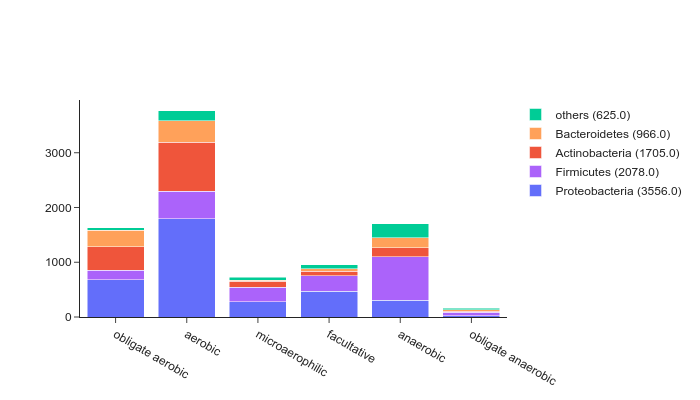

In [4]:
_df = draw_df.reindex(columns = order_t+['total number'])
fig = go.Figure()
for idx,row in _df.iterrows():
    if row['total number']>100:
        fig.add_trace(go.Bar(x=list(_df.columns)[:-1],
                    y=list(row.values)[:-1],
                             marker={'color':tax_map[idx]},
                             name=f"{idx} ({row['total number']})" ))
fig.update_layout(barmode='stack',width=700,height=400,
                 template='simple_white')  
display(Image(fig.to_image()))

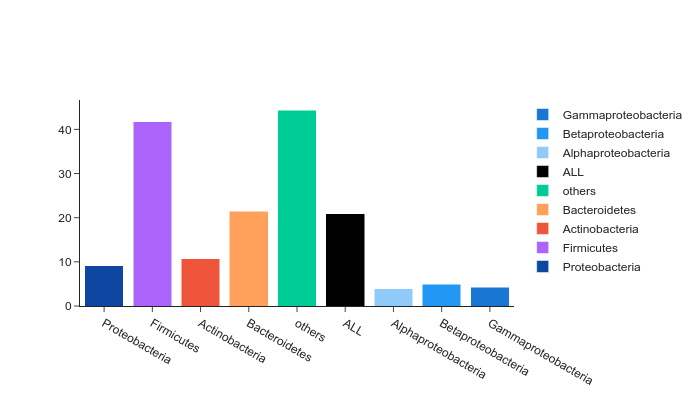

In [5]:
new_tax_map = {'Proteobacteria':"#0D47A1",
 'Firmicutes':"#ab63fa",
 'Actinobacteria':"#ef553b",
 'Bacteroidetes':"#ffa15a",
 "others":"#00cc96",
 "Alphaproteobacteria":"#90CAF9",  
 "Betaproteobacteria":"#2196F3",
 "Gammaproteobacteria":"#1976D2",
 }


_df = pd.concat([class2phe2num_df,phy2phe2num_df])
v = list(new_tax_map)
v.remove('others')
d1 = _df.loc[v,:]

d2 = phy2phe2num_df.loc[phy2phe2num_df.index.difference(list(tax_map)),]
d2 = pd.DataFrame(d2.applymap(lambda x:0 if str(x)== 'NA' else x).sum(0)).T
d2.index = ['others']
draw_df = pd.concat([d1,d2])

# ratio of anaerobe
anaerobic_ratio = (draw_df.loc[:,['anaerobic','obligate anaerobic']].sum(1)/draw_df['total number']*100)
final_d = anaerobic_ratio.to_dict()
#final_d.update(_df)
fig = go.Figure()
for t in list(new_tax_map)[:-3]:
    v = final_d[t]
    fig.add_bar(x=[t],y=[v],
            marker={'color':new_tax_map[t]},name=t)
    
fig.add_bar(x=['ALL'],y=[sum(y_bin==0)/len(y_bin)*100],
        marker={'color':'#000000'},name='ALL')
for t in list(new_tax_map)[-3:]:
    v = final_d[t]
    fig.add_bar(x=[t],y=[v],
            marker={'color':new_tax_map[t]},name=t)
fig.update_layout(barmode='stack',width=700,height=400,
                 template='simple_white')    
display(Image(fig.to_image()))
fig.write_image('/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/anaerobe_ratios.pdf')

In [6]:
final_d

{'Proteobacteria': 9.139482564679415,
 'Firmicutes': 41.72281039461021,
 'Actinobacteria': 10.733137829912023,
 'Bacteroidetes': 21.428571428571427,
 'Alphaproteobacteria': 3.853211009174312,
 'Betaproteobacteria': 4.878048780487805,
 'Gammaproteobacteria': 4.244372990353698,
 'others': 44.32}

# read in completeness

In [3]:
complete_df = pd.read_csv(
    "/mnt/ivy/thliao/project/ML_oxygen/training_sets/micomplete_o/complet_df.tab",
    sep="\t",
    index_col=0,
)
genome2completeness = dict(zip(complete_df.index, complete_df["Weighted completeness"]))
completeness_array = np.array(
    [genome2completeness.get(_, 0) for _ in bac_ids]
)

In [98]:
def vis_by_metabolism(draw_df, y=None, color_map=None,label='Oxygen requirement'):
    if y is None:
        draw_df.loc[:, label] = list(sub_NCBI_df.reindex(draw_df.index)["metabolism"])
    else:
        draw_df.loc[:, label] = list(y)
    draw_df.loc[:, "show_text"] = [
        g + ";" + m
        for g, m in zip(
            draw_df.index, list(sub_NCBI_df.reindex(draw_df.index)["metabolism"])
        )
    ]
    fig = px.scatter(
        draw_df,
        x=0,
        y=1,
        color=label,
        # opacity=0.8,
        #hover_name="show_text",
        render_mode='svg',
        color_discrete_map={} if color_map is None else color_map,
    )
    #     fig.layout.xaxis.title.text = f'PC1 ({round(pca.explained_variance_ratio_[0]*100,2)} %)'
    #     fig.layout.yaxis.title.text = f'PC2 ({round(pca.explained_variance_ratio_[1]*100,2)} %)'
    # fig.show()
    # fig.layout.template = 'simple_white'
    return fig

# MDS visualization

## KEGG (cityblock)

In [161]:
from scipy.spatial.distance import pdist, squareform
from sklearn import decomposition, manifold

redo = False
if not exists(
    f"/mnt/ivy/thliao/project/ML_oxygen/pairwise_distance/Kegg_bin_cityblock_distant.tab"
) or redo:
    cb_dist = squareform(pdist(kegg_bin_df, metric="cityblock"))
    kegg_cb_dist_df = pd.DataFrame(
        cb_dist, index=kegg_bin_df.index, columns=kegg_bin_df.index
    )
    kegg_cb_dist_df.to_csv(
        f"/mnt/ivy/thliao/project/ML_oxygen/pairwise_distance/Kegg_bin_cityblock_distant.tab",
        sep="\t",
        index=1,
        index_label="Assembly IDs",
    )
else:
    kegg_cb_dist_df = pd.read_csv(
        f"/mnt/ivy/thliao/project/ML_oxygen/pairwise_distance/Kegg_bin_cityblock_distant.tab",
        sep="\t",
        index_col=0,
    )

otab = f"/home-user/thliao/project/ML_oxygen/pairwise_distance/kegg_MDS_cityblock.tab"
if not exists(otab) or redo:
    mds = manifold.MDS(dissimilarity="precomputed", n_jobs=-1)
    projected_X = mds.fit_transform(kegg_cb_dist_df.values)
    _draw_df = pd.DataFrame(projected_X[:, :2])
    _draw_df.index = kegg_bin_df.index
    _draw_df.to_csv(otab, sep="\t", index=1, index_label="Assembly IDs")
else:
    _draw_df = pd.read_csv(otab, sep="\t", index_col=0)
    if 0 not in _draw_df.columns:
        new_cols = []
        for c in _draw_df.columns:
            try:
                new_cols.append(int(c))
            except:
                new_cols.append(c)
        _draw_df.columns = new_cols

### color (phyla)

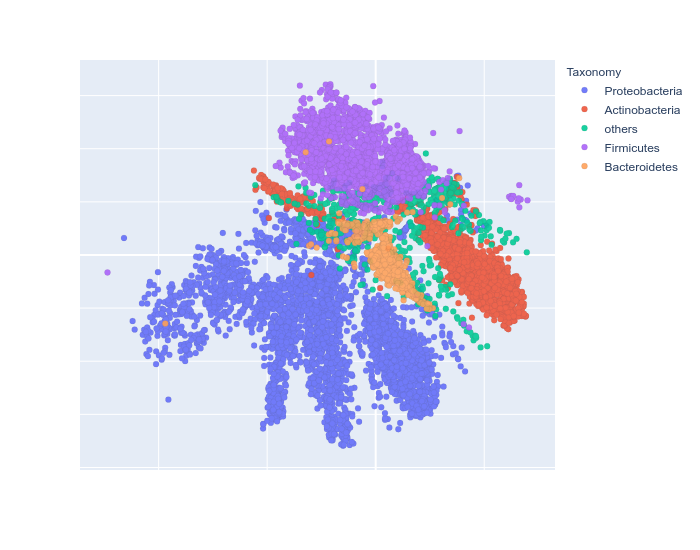

In [162]:
_draw_df = _draw_df.reindex(sub_NCBI_df.index)

prevalent_tax = ['Proteobacteria',
                 'Firmicutes',
                 'Actinobacteria',
                 'Bacteroidetes',
                 #'Euryarchaeota'
                ]
y = ['others' 
     if sub_NCBI_df.loc[x, 'phylum'] not in prevalent_tax else sub_NCBI_df.loc[x, 'phylum'] 
     for x in _draw_df.index]
fig = vis_by_metabolism(_draw_df, 
                        y=y,label='Taxonomy')
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
from kaleido.scopes.plotly import PlotlyScope
scope = PlotlyScope()
with open("training_sets/outputs/MDS_cityblock_KO_phyla.pdf", "wb") as f:
    f.write(scope.transform(fig, format="pdf"))
display(Image(fig.to_image()))

### color (oxygen)

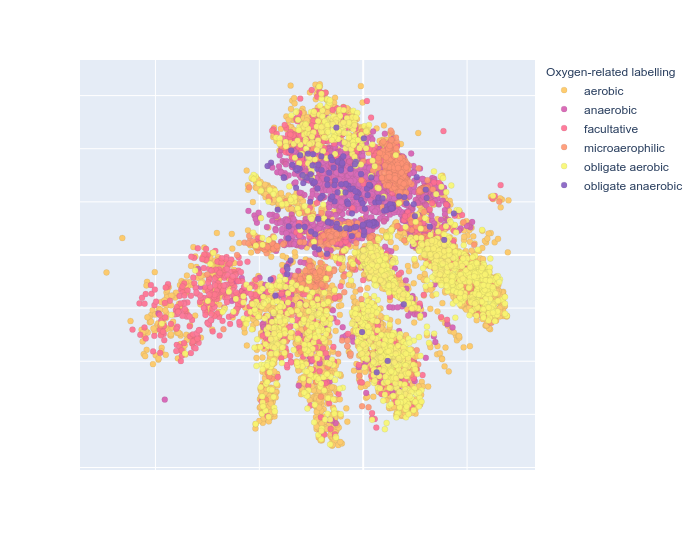

In [163]:
_draw_df = _draw_df.reindex(sub_NCBI_df.index)
fig = vis_by_metabolism(_draw_df, color_map=color_map,label='Oxygen-related labelling')
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))

fig.write_image('training_sets/outputs/MDS_cityblock_KO_Oxygen.pdf',engine="kaleido",format='pdf')

### color (completeness)

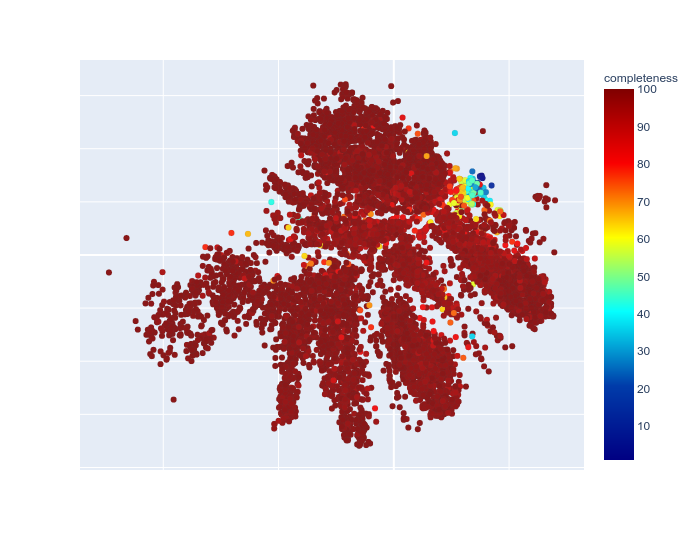

In [164]:
#sub_bac_ids = [_ for _ in bac_ids if _ in sub_NCBI_df.index]
#_draw_df = _draw_df.reindex(bac_ids)
# _draw_df.loc[:, "show_text"] = [
#     g + ";" + m for g, m in zip(bac_ids, list(sub_NCBI_df.reindex(bac_ids)["metabolism"]))
# ]
draw_df = _draw_df.reindex(sub_NCBI_df.index)
draw_df.loc[:, "completeness"] = [(genome2completeness[_])*100 for _ in draw_df.index]
fig = px.scatter(
    draw_df,
    x=0,
    y=1,
    color="completeness",
    color_continuous_scale='Jet',
    render_mode='svg',
    # opacity=0.8,
    #hover_name="show_text",
    # color_discrete_map={} if color_map is None else color_map,
    # color_continuous_scale=px.colors.sequential.Aggrnyl
)
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
fig.write_image('training_sets/outputs/MDS_cityblock_KO_Completeness.pdf',engine="kaleido",format='pdf')
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))

### pfam

In [165]:
from scipy.spatial.distance import pdist, squareform
from sklearn import decomposition, manifold

redo = False
if not exists(
    f"/mnt/ivy/thliao/project/ML_oxygen/pairwise_distance/pfam_bin_cityblock_distant.tab"
) or redo:
    pfam_cb_dist = squareform(pdist(pfam_bin_df, metric="cityblock"))
    pfam_cb_dist_df = pd.DataFrame(
        pfam_cb_dist, index=pfam_bin_df.index, columns=pfam_bin_df.index
    )
    pfam_cb_dist_df.to_csv(
        f"/mnt/ivy/thliao/project/ML_oxygen/pairwise_distance/pfam_bin_cityblock_distant.tab",
        sep="\t",
        index=1,
        index_label="Assembly IDs",
    )
else:
    pfam_cb_dist_df = pd.read_csv(
        f"/mnt/ivy/thliao/project/ML_oxygen/pairwise_distance/pfam_bin_cityblock_distant.tab",
        sep="\t",
        index_col=0,
    )

In [166]:
otab = f"/home-user/thliao/project/ML_oxygen/pairwise_distance/pfam_MDS_cityblock.tab"
if not exists(otab):
    mds = manifold.MDS(dissimilarity="precomputed", n_jobs=-1)
    projected_X = mds.fit_transform(pfam_cb_dist_df.values)
    _draw_df = pd.DataFrame(projected_X[:, :2])
    _draw_df.index = pfam_bin_df.index
    _draw_df.to_csv(otab, sep="\t", index=1, index_label="Assembly IDs")
else:
    _draw_df = pd.read_csv(otab, sep="\t", index_col=0)
    if 0 not in _draw_df.columns:
        new_cols = []
        for c in _draw_df.columns:
            try:
                new_cols.append(int(c))
            except:
                new_cols.append(c)
        _draw_df.columns = new_cols

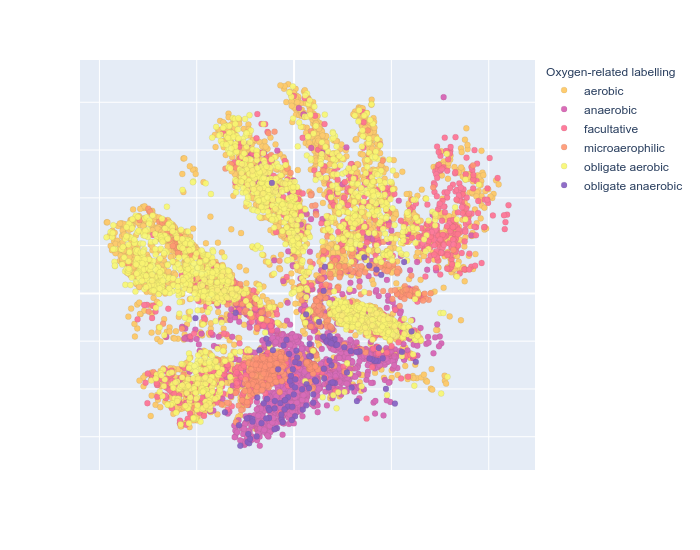

In [167]:
_draw_df = _draw_df.reindex(sub_NCBI_df.index)
fig = vis_by_metabolism(_draw_df, color_map=color_map,label='Oxygen-related labelling')
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
# fig.layout.template = 'simple_white'
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))
fig.write_image('training_sets/outputs/MDS_pfam_cityblock_Oxygen.pdf',engine="kaleido",format='pdf')

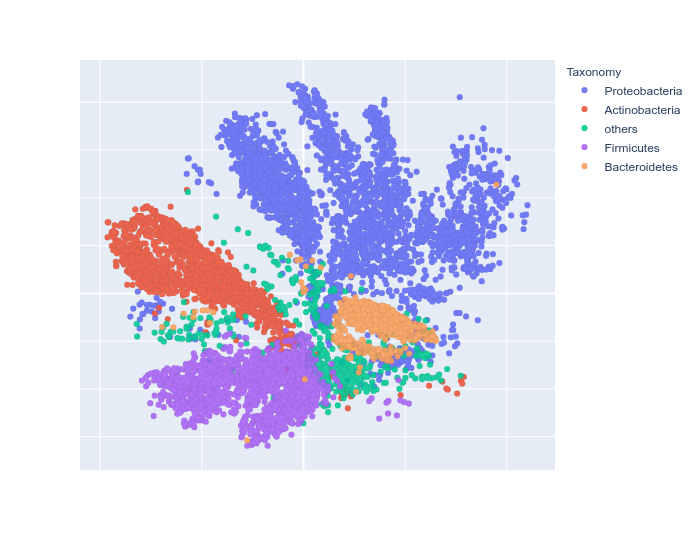

In [168]:
_draw_df = _draw_df.reindex(sub_NCBI_df.index)
prevalent_tax  = ['Proteobacteria',
 'Firmicutes',
 'Actinobacteria',
 'Bacteroidetes',
 'Euryarchaeota']
y = ['others' if sub_NCBI_df.loc[x,'phylum'] not in prevalent_tax else sub_NCBI_df.loc[x,'phylum'] for x in _draw_df.index]

fig = vis_by_metabolism(_draw_df,y=y,label='Taxonomy')
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))
fig.write_image('training_sets//outputs/MDS_pfam_cityblock_phyla.pdf',engine="kaleido",format='pdf')

### Mash distance (whole genomes)

In [169]:
otab = f"/home-user/thliao/project/ML_oxygen/pairwise_distance/mash_MDS.tab"
if not exists(otab):
    dm = pd.read_csv(f"./pairwise_distance/pairwise_mash.tab",sep="\t", index_col=0)
    mds = manifold.MDS(dissimilarity="precomputed", n_jobs=-1)
    projected_X = mds.fit_transform(dm.values)
    MDS_proj_df = pd.DataFrame(projected_X[:, :2])
    MDS_proj_df.index = dm.index
    MDS_proj_df.to_csv(otab, sep="\t", index=1, index_label="Assembly IDs")
else:
    MDS_proj_df = pd.read_csv(otab, sep="\t", index_col=0)
    if 0 not in MDS_proj_df.columns:
        new_cols = []
        for c in MDS_proj_df.columns:
            try:
                new_cols.append(int(c))
            except:
                new_cols.append(c)
        MDS_proj_df.columns = new_cols

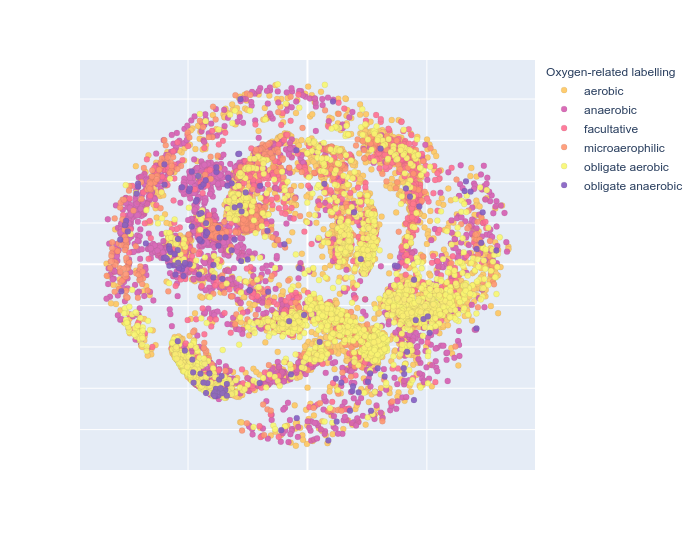

In [170]:
_draw_df = MDS_proj_df.copy() 

y = list(sub_NCBI_df.reindex(_draw_df.index)["metabolism"])

_draw_df = _draw_df.reindex(sub_NCBI_df.index)
fig = vis_by_metabolism(_draw_df, y=y,color_map=color_map,label='Oxygen-related labelling')
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))
fig.write_image('training_sets/outputs/MDS_whole_mash_Oxygen.pdf',engine="kaleido",format='pdf')

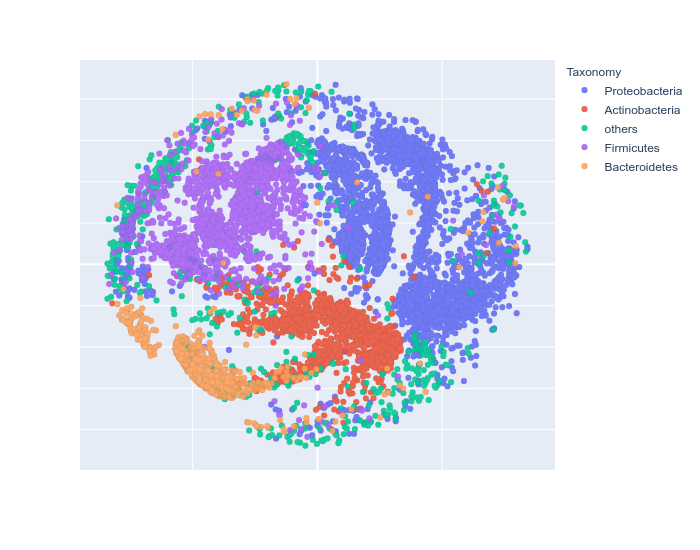

In [171]:
_draw_df = MDS_proj_df.copy()
_draw_df = _draw_df.reindex(sub_NCBI_df.index)
prevalent_tax  = ['Proteobacteria',
 'Firmicutes',
 'Actinobacteria',
 'Bacteroidetes',
 'Euryarchaeota']
y = ['others' if sub_NCBI_df.loc[x,'phylum'] not in prevalent_tax else sub_NCBI_df.loc[x,'phylum'] for x in _draw_df.index]
fig = vis_by_metabolism(_draw_df, y=y,label='Taxonomy')
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))
fig.write_image('training_sets//outputs/MDS_whole_mash_phyla.pdf',engine="kaleido",format='pdf')

### Mash distance (coding sequences)

In [172]:
otab = f"/home-user/thliao/project/ML_oxygen/pairwise_distance/ffn_mash_MDS.tab"
if not exists(otab):
    dm = pd.read_csv(f"./pairwise_distance/pairwise_ffn_mash.tab",sep="\t", index_col=0)
    mds = manifold.MDS(dissimilarity="precomputed", n_jobs=-1)
    projected_X = mds.fit_transform(dm.values)
    MDS_proj_df = pd.DataFrame(projected_X[:, :2])
    MDS_proj_df.index = dm.index
    MDS_proj_df.to_csv(otab, sep="\t", index=1, index_label="Assembly IDs")
else:
    MDS_proj_df = pd.read_csv(otab, sep="\t", index_col=0)
    if 0 not in MDS_proj_df.columns:
        new_cols = []
        for c in MDS_proj_df.columns:
            try:
                new_cols.append(int(c))
            except:
                new_cols.append(c)
        MDS_proj_df.columns = new_cols

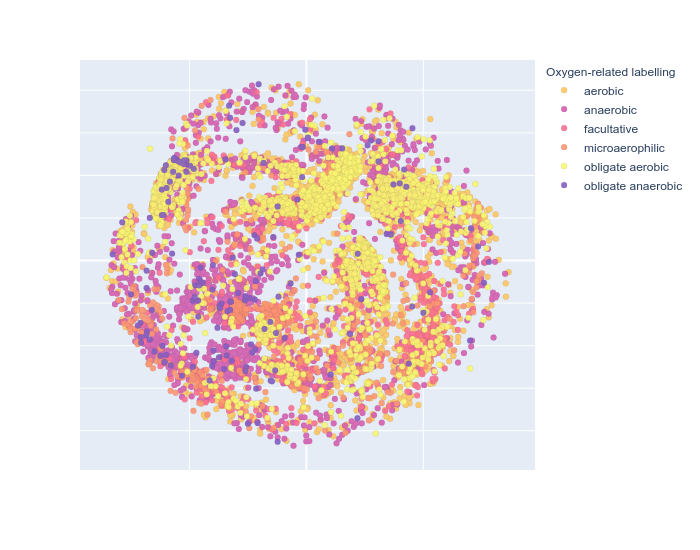

In [173]:
_draw_df = MDS_proj_df.copy() 
#y = list(sub_NCBI_df.reindex(_draw_df.index)["metabolism"])

_draw_df = _draw_df.reindex(sub_NCBI_df.index)
fig = vis_by_metabolism(_draw_df,
                        color_map=color_map,label='Oxygen-related labelling')
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))
fig.write_image('training_sets/outputs/MDS_ffn_mash_Oxygen.pdf',engine="kaleido",format='pdf')

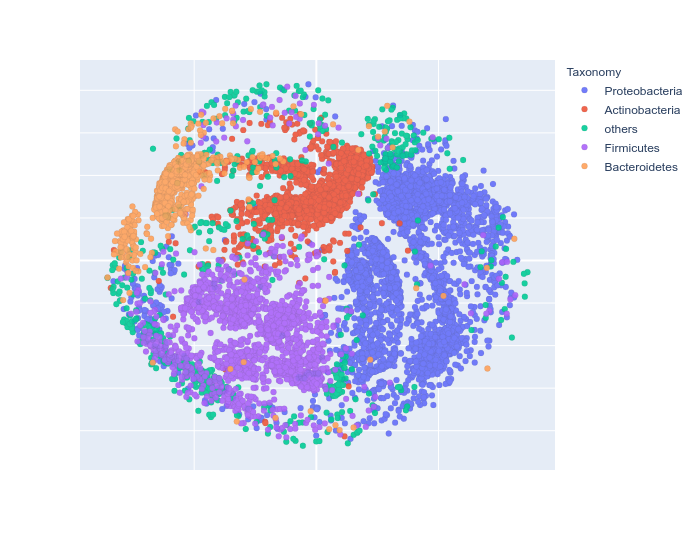

In [174]:
_draw_df = MDS_proj_df.copy()
_draw_df = _draw_df.reindex(sub_NCBI_df.index)
prevalent_tax  = ['Proteobacteria',
 'Firmicutes',
 'Actinobacteria',
 'Bacteroidetes',
 'Euryarchaeota']
y = ['others' if sub_NCBI_df.loc[x,'phylum'] not in prevalent_tax else sub_NCBI_df.loc[x,'phylum'] for x in _draw_df.index]
fig = vis_by_metabolism(_draw_df, y=y,label='Taxonomy')

fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))
fig.write_image('training_sets/outputs/MDS_ffn_mash_phyla.pdf',engine="kaleido",format='pdf')

### using top120 
(see [backward_selection.ipynb](../Feature_selection_association/backward_selection.ipynb))

In [175]:
top50 = open('/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/top50.txt').read().strip().split('\n')

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/top120.txt'

In [ ]:
# from scipy.spatial.distance import pdist, squareform
# from sklearn import decomposition, manifold
# base_tab = f"/mnt/ivy/thliao/project/ML_oxygen/pairwise_distance/top120KEGG_bin_cityblock_distant.tab"

# if not exists(base_tab ):
#     cb_dist = squareform(pdist(X.loc[:,top120], metric="cityblock"))
#     kegg_cb_dist_df = pd.DataFrame(
#         cb_dist, index=X.index, columns=X.index
#     )
#     kegg_cb_dist_df.to_csv(
#         base_tab,
#         sep="\t",
#         index=1,
#         index_label="Assembly IDs",
#     )
# else:
#     kegg_cb_dist_df = pd.read_csv(
#         base_tab,
#         sep="\t",
#         index_col=0,
#     )

# otab = f"/home-user/thliao/project/ML_oxygen/pairwise_distance/top120KEGG_MDS_cityblock.tab"
# if not exists(otab):
#     mds = manifold.MDS(dissimilarity="precomputed", n_jobs=-1)
#     projected_X = mds.fit_transform(kegg_cb_dist_df.values)
#     _draw_df = pd.DataFrame(projected_X[:, :2])
#     _draw_df.index = X.index
#     _draw_df.to_csv(otab, sep="\t", index=1, index_label="Assembly IDs")
# else:
#     _draw_df = pd.read_csv(otab, sep="\t", index_col=0)
#     if 0 not in _draw_df.columns:
#         new_cols = []
#         for c in _draw_df.columns:
#             try:
#                 new_cols.append(int(c))
#             except:
#                 new_cols.append(c)
#         _draw_df.columns = new_cols

# _draw_df = _draw_df.reindex(X.index)
# fig = vis_by_metabolism(_draw_df, color_map=color_map,label='')
# fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
# fig.update_layout(width=700,height=550,
#                   yaxis_title_text='',xaxis_title_text='',
#                   yaxis_showticklabels=False,xaxis_showticklabels=False,
#                   yaxis_showspikes=False,xaxis_showspikes=False,
#                  #template='ggplot2'
#                  )
# # img_bytes1 = fig.to_image(format="pdf", engine="kaleido")
# # #display(Image(img_bytes1))
# # fig.show()
# fig.write_image('training_sets//outputs/MDS_cityblock_KO_Oxygen.pdf',engine="kaleido",format='pdf')

## t-SNE visualization

### KEGG

In [ ]:
redo = False
otab = f"/home-user/thliao/project/ML_oxygen/pairwise_distance/kegg_tSNE_cityblock.tab"
if not exists(otab) or redo:
    tsne = manifold.TSNE(metric="precomputed",perplexity=200)
    projected_X = tsne.fit_transform(kegg_cb_dist_df.values)
    _draw_df = pd.DataFrame(projected_X[:, :2])
    _draw_df.index = kegg_cb_dist_df.index
    _draw_df.to_csv(otab, sep="\t", index=1, index_label="Assembly IDs")
else:
    _draw_df = pd.read_csv(otab, sep="\t", index_col=0)
    if 0 not in _draw_df.columns:
        new_cols = []
        for c in _draw_df.columns:
            try:
                new_cols.append(int(c))
            except:
                new_cols.append(c)
        _draw_df.columns = new_cols

In [ ]:
tsne = manifold.TSNE(metric="precomputed",perplexity=200)
projected_X = tsne.fit_transform(kegg_cb_dist_df.values)
_draw_df = pd.DataFrame(projected_X[:, :2])
_draw_df.index = kegg_cb_dist_df.index
#

_draw_df = _draw_df.reindex(sub_NCBI_df.index)
y = list(sub_NCBI_df.reindex(_draw_df.index)["metabolism"])
fig = vis_by_metabolism(_draw_df, y=y,color_map=color_map,label='Oxygen-related labelling')
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))
fig.write_image('training_sets/outputs/tSNE_cityblock_KO_Oxygen.pdf',engine="kaleido",format='pdf')

In [ ]:
_draw_df = _draw_df.reindex(sub_NCBI_df.index)
y = list(sub_NCBI_df.reindex(_draw_df.index)["metabolism"])
fig = vis_by_metabolism(_draw_df, y=y,color_map=color_map,label='Oxygen-related labelling')
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))
fig.write_image('training_sets/outputs/tSNE_cityblock_KO_Oxygen.pdf',engine="kaleido",format='pdf')

In [ ]:
_draw_df = _draw_df.reindex(sub_NCBI_df.index)
prevalent_tax  = ['Proteobacteria',
 'Firmicutes',
 'Actinobacteria',
 'Bacteroidetes',
 'Euryarchaeota']
y = ['others' if sub_NCBI_df.loc[x,'phylum'] not in prevalent_tax else sub_NCBI_df.loc[x,'phylum'] for x in _draw_df.index]
fig = vis_by_metabolism(_draw_df, y=y,color_map=tax_map,label='Taxonomy')
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
# fig.layout.template = 'simple_white'
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))
fig.write_image('training_sets/outputs/tSNE_cityblock_KO_phyla.pdf',engine="kaleido",format='pdf',)

### mash

In [ ]:
otab = f"/home-user/thliao/project/ML_oxygen/pairwise_distance/mash_tSNE.tab"
if not exists(otab):
    dm = pd.read_csv(f"./pairwise_distance/pairwise_mash.tab",sep="\t", index_col=0)
    tsne = manifold.TSNE(metric="precomputed",perplexity=200)
    projected_X = tsne.fit_transform(dm.values)
    _draw_df = pd.DataFrame(projected_X[:, :2])
    _draw_df.index = dm.index
    _draw_df.to_csv(otab, sep="\t", index=1, index_label="Assembly IDs")
else:
    _draw_df = pd.read_csv(otab, sep="\t", index_col=0)
    if 0 not in _draw_df.columns:
        new_cols = []
        for c in _draw_df.columns:
            try:
                new_cols.append(int(c))
            except:
                new_cols.append(c)
        _draw_df.columns = new_cols

In [ ]:
_draw_df = _draw_df.reindex(sub_NCBI_df.index)
y = list(sub_NCBI_df.reindex(_draw_df.index)["metabolism"])
fig = vis_by_metabolism(_draw_df, y=y,color_map=color_map,label='Oxygen-related labelling')
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))
fig.write_image('training_sets/outputs/tSNE_mash_Oxygen.pdf',engine="kaleido",format='pdf')

In [ ]:
_draw_df = _draw_df.reindex(sub_NCBI_df.index)
prevalent_tax  = ['Proteobacteria',
 'Firmicutes',
 'Actinobacteria',
 'Bacteroidetes',
 'Euryarchaeota']
y = ['others' if sub_NCBI_df.loc[x,'phylum'] not in prevalent_tax else sub_NCBI_df.loc[x,'phylum'] for x in _draw_df.index]
fig = vis_by_metabolism(_draw_df, y=y,color_map=tax_map,label='Taxonomy')
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))
fig.write_image('training_sets/outputs/tSNE_mash_phyla.pdf',engine="kaleido",format='pdf')

### pfam

In [ ]:
otab = f"/home-user/thliao/project/ML_oxygen/pairwise_distance/pfam_tSNE_cityblock.tab"
if not exists(otab):
    tsne = manifold.TSNE(metric="precomputed",perplexity=200)
    projected_X = tsne.fit_transform(pfam_cb_dist_df.values)
    _draw_df = pd.DataFrame(projected_X[:, :2])
    _draw_df.index = pfam_cb_dist_df.index
    _draw_df.to_csv(otab, sep="\t", index=1, index_label="Assembly IDs")
else:
    _draw_df = pd.read_csv(otab, sep="\t", index_col=0)
    if 0 not in _draw_df.columns:
        new_cols = []
        for c in _draw_df.columns:
            try:
                new_cols.append(int(c))
            except:
                new_cols.append(c)
        _draw_df.columns = new_cols


In [ ]:
_draw_df = _draw_df.reindex(sub_NCBI_df.index)
prevalent_tax = ['Proteobacteria',
                 'Firmicutes',
                 'Actinobacteria',
                 'Bacteroidetes',
                 'Euryarchaeota']
y = ['others' if sub_NCBI_df.loc[x, 'phylum']
     not in prevalent_tax else sub_NCBI_df.loc[x, 'phylum'] for x in _draw_df.index]
fig = vis_by_metabolism(_draw_df, y=y,color_map=tax_map,label='Taxonomy')
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
# fig.layout.template = 'simple_white'
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))
fig.write_image('training_sets/outputs/tSNE_cityblock_Pfam_phyla.pdf',engine="kaleido",format='pdf')

In [ ]:
_draw_df = _draw_df.reindex(sub_NCBI_df.index)
y = list(sub_NCBI_df.reindex(_draw_df.index)["metabolism"])
fig = vis_by_metabolism(_draw_df, y=y,color_map=color_map,label='Oxygen-related labelling')
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
# fig.layout.template = 'simple_white'
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))
fig.write_image('training_sets/outputs/tSNE_cityblock_Pfam_Oxygen.pdf',engine="kaleido",format='pdf')

### mash

In [176]:
otab = f"/home-user/thliao/project/ML_oxygen/pairwise_distance/ffn_mash_tSNE.tab"
if not exists(otab):
    dm = pd.read_csv(f"./pairwise_distance/pairwise_ffn_mash.tab",sep="\t", index_col=0)
    tsne = manifold.TSNE(metric="precomputed",perplexity=200)
    projected_X = tsne.fit_transform(dm.values)
    _draw_df = pd.DataFrame(projected_X[:, :2])
    MDS_proj_df = pd.DataFrame(projected_X[:, :2])
    MDS_proj_df.index = dm.index
    MDS_proj_df.to_csv(otab, sep="\t", index=1, index_label="Assembly IDs")
else:
    MDS_proj_df = pd.read_csv(otab, sep="\t", index_col=0)
    if 0 not in MDS_proj_df.columns:
        new_cols = []
        for c in MDS_proj_df.columns:
            try:
                new_cols.append(int(c))
            except:
                new_cols.append(c)
        MDS_proj_df.columns = new_cols

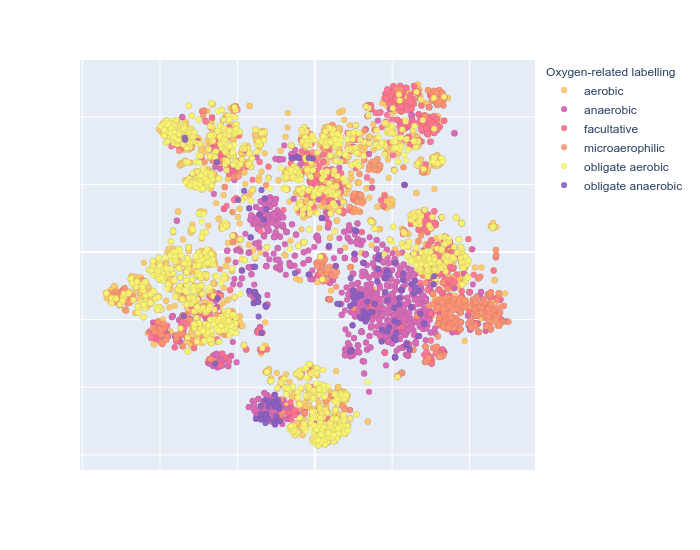

In [177]:
_draw_df = MDS_proj_df.reindex(bac_ids)
y = list(sub_NCBI_df.reindex(_draw_df.index)["metabolism"])
fig = vis_by_metabolism(_draw_df, y=y,color_map=color_map,label='Oxygen-related labelling')
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))
fig.write_image('training_sets/outputs/tSNE_ffn_mash_Oxygen.pdf',engine="kaleido",format='pdf')

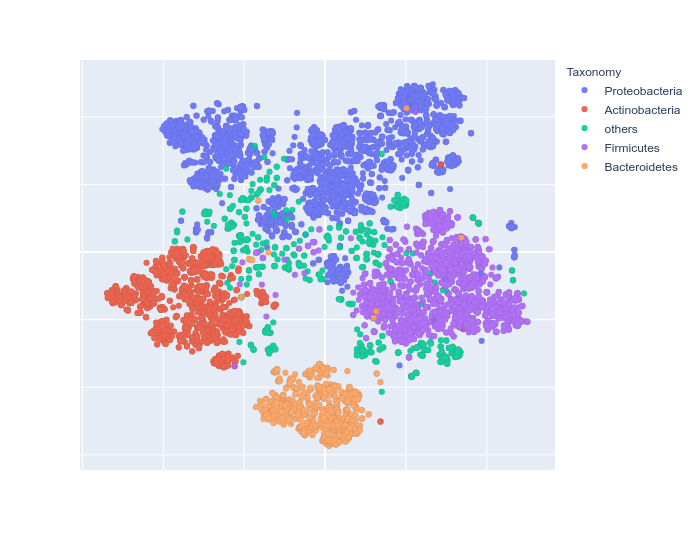

In [178]:
_draw_df = MDS_proj_df.reindex(bac_ids)
prevalent_tax = ['Proteobacteria',
                 'Firmicutes',
                 'Actinobacteria',
                 'Bacteroidetes',
                 'Euryarchaeota']
y = ['others' if sub_NCBI_df.loc[x, 'phylum']
     not in prevalent_tax else sub_NCBI_df.loc[x, 'phylum'] for x in _draw_df.index]
fig = vis_by_metabolism(_draw_df, y=y,color_map=tax_map,label='Taxonomy')
fig.update_traces(opacity=0.9,marker=dict(line=dict(width=0.1)))
fig.update_layout(width=700,height=550,
                  yaxis_title_text='',xaxis_title_text='',
                  yaxis_showticklabels=False,xaxis_showticklabels=False,
                  yaxis_showspikes=False,xaxis_showspikes=False,
                 #template='ggplot2'
                 )
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))
fig.write_image('training_sets/outputs/tSNE_ffn_mash_phyla.pdf',engine="kaleido",format='pdf')

# performance using other validated feature as y

In [95]:
validate_binary_cols = {"gram_stain": {"positive": 1, "negative": 0},
                        "sporulation": {"yes": 1, "no": 0},
                        "motility": {"no": 0,
                                     'yes': 1,
                                     'flagella': 1,
                                     'gliding': 1,
                                     'axial filament': 1},
                        "metabolism":{"aerobic": 1,
             "obligate aerobic": 1,
             "anaerobic": 0,
             "facultative": 1,
             "microaerophilic": 1,
             "obligate anaerobic": 0,
             }
                        }

from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold,StratifiedShuffleSplit

In [96]:
fea2performance = defaultdict(list)
for fea, mapping_d in validate_binary_cols.items():
    remaining_ids = sub_NCBI_df.index[~sub_NCBI_df.loc[:,fea].isna()]
    sub_x = X.loc[remaining_ids]
    sub_y = np.array([mapping_d[v] for v in sub_NCBI_df.loc[remaining_ids,fea]])
    print(sub_x.shape)
    print(Counter(sub_y))
    performance_d = defaultdict(list)
    sssp = StratifiedShuffleSplit(n_splits=5)
    for train_index, test_index in tqdm(sssp.split(sub_x, sub_y)):
        X_train_large, X_test_large = sub_x.iloc[train_index,
                                             :], sub_x.iloc[test_index, :]
        y_train_large, y_test_large = sub_y[train_index], sub_y[test_index]
        rforest = RandomForestClassifier(n_jobs=-1,class_weight = 'balanced_subsample')
        rforest.fit(X_train_large, y_train_large)
        y_pred_label = rforest.predict(X_test_large)
        y_pred_proba = rforest.predict_proba(X_test_large)
        acc = metrics.balanced_accuracy_score(y_test_large, y_pred_label)
        auc = metrics.roc_auc_score(y_test_large, y_pred_proba[:,1])
        performance_d['auc'].append(auc)
        performance_d['acc'].append(acc)
    fea2performance[fea] = performance_d
print(fea2performance)

0it [00:00, ?it/s]

(6178, 11858)
Counter({0: 3595, 1: 2583})


5it [00:10,  2.16s/it]
0it [00:00, ?it/s]

(4295, 11858)
Counter({0: 3402, 1: 893})


5it [00:08,  1.65s/it]
0it [00:00, ?it/s]

(4728, 11858)
Counter({0: 2459, 1: 2269})


5it [00:09,  1.84s/it]
0it [00:00, ?it/s]

(8943, 11858)
Counter({1: 7073, 0: 1870})


5it [00:14,  2.93s/it]

defaultdict(<class 'list'>, {'gram_stain': defaultdict(<class 'list'>, {'auc': [0.9969422911283377, 0.9983527131782945, 0.9950150732127476, 0.9930932385874245, 0.9958064168819982], 'acc': [0.9844638242894057, 0.9883397932816538, 0.978359173126615, 0.9850129198966409, 0.9816860465116279]}), 'sporulation': defaultdict(<class 'list'>, {'auc': [0.9770997396948828, 0.9801311410590134, 0.9705097367293815, 0.9861939437872747, 0.9645622590530166], 'acc': [0.9421068239480708, 0.9445451250453063, 0.9264720419124188, 0.9631124584006063, 0.9252528913638012]}), 'motility': defaultdict(<class 'list'>, {'auc': [0.9348966727552738, 0.9322194763797859, 0.9489900075212206, 0.9446115826797034, 0.9077038788009025], 'acc': [0.868208516886931, 0.8617617563840836, 0.8680294402062964, 0.8920883922495613, 0.8373715124816447]}), 'metabolism': defaultdict(<class 'list'>, {'auc': [0.9622949333816732, 0.9932550832351431, 0.977469107828031, 0.9731902776518928, 0.9721706093839694], 'acc': [0.9055598356445814, 0.9201

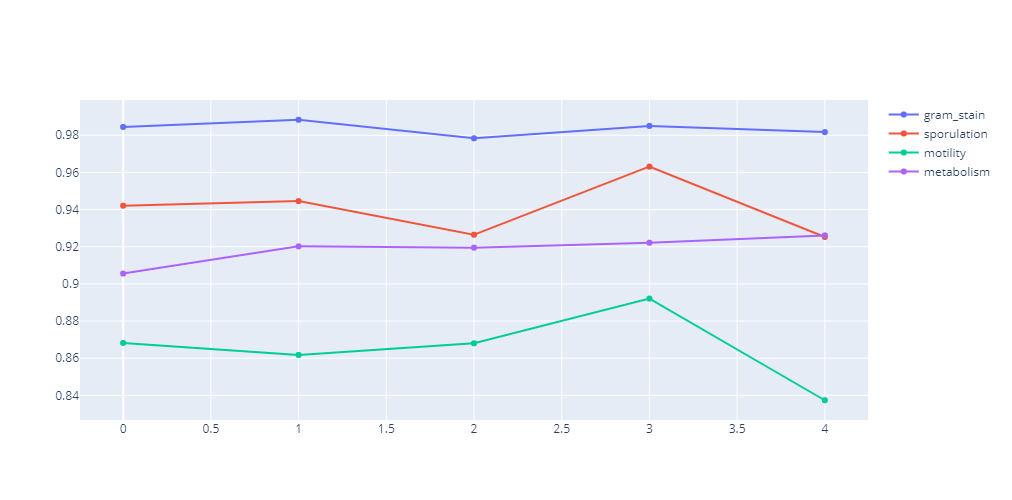

In [97]:
import plotly.graph_objects as go
fig = go.Figure()
for fea,per in fea2performance.items():
    fig.add_scatter(x=list(range(len(per['acc']))),
                   y=per['acc'],name=fea)
fig.layout.width = 500
fig.layout.height= 500
fig.show()

In [98]:
fea2performance = defaultdict(list)
for fea, mapping_d in validate_binary_cols.items():
    remaining_ids = sub_NCBI_df.index[~sub_NCBI_df.loc[:,fea].isna()]
    sub_x = X.loc[remaining_ids]
    sub_y = np.array([mapping_d[v] for v in sub_NCBI_df.loc[remaining_ids,fea]])
    print(sub_x.shape)
    print(Counter(sub_y))
    performance_d = defaultdict(list)
    sssp = StratifiedShuffleSplit(n_splits=5)
    for train_index, test_index in tqdm(sssp.split(sub_x, sub_y)):
        X_train_large, X_test_large = sub_x.iloc[train_index,
                                             :], sub_x.iloc[test_index, :]
        y_train_large, y_test_large = sub_y[train_index], sub_y[test_index]
        rforest = RandomForestClassifier(n_jobs=-1,class_weight = 'balanced_subsample')
        rforest.fit(X_train_large, y_train_large)
        y_pred_label = rforest.predict(X_test_large)
        y_pred_proba = rforest.predict_proba(X_test_large)
        acc = metrics.balanced_accuracy_score(y_test_large, y_pred_label)
        auc = metrics.roc_auc_score(y_test_large, y_pred_proba[:,1])
        performance_d['auc'].append(auc)
        performance_d['acc'].append(acc)
    fea2performance[fea] = performance_d
print(fea2performance)

0it [00:00, ?it/s]

(6178, 11858)
Counter({0: 3595, 1: 2583})


5it [00:10,  2.16s/it]
0it [00:00, ?it/s]

(4295, 11858)
Counter({0: 3402, 1: 893})


5it [00:07,  1.60s/it]
0it [00:00, ?it/s]

(4728, 11858)
Counter({0: 2459, 1: 2269})


5it [00:09,  1.85s/it]
0it [00:00, ?it/s]

(8943, 11858)
Counter({1: 7073, 0: 1870})


5it [00:13,  2.79s/it]

defaultdict(<class 'list'>, {'gram_stain': defaultdict(<class 'list'>, {'auc': [0.9909991386735574, 0.9957364341085271, 0.998067398794143, 0.9905953919035314, 0.9974644702842378], 'acc': [0.963953488372093, 0.9797480620155039, 0.9861111111111112, 0.9769702842377261, 0.9819767441860465]}), 'sporulation': defaultdict(<class 'list'>, {'auc': [0.9794556657550495, 0.9748756136940262, 0.9970344986655244, 0.9866717190022735, 0.9763913143760915], 'acc': [0.9125506606477973, 0.939421397739629, 0.9604270321921644, 0.9726350126857557, 0.9303766186694784]}), 'motility': defaultdict(<class 'list'>, {'auc': [0.9352458722825115, 0.9394094051072669, 0.9320314458651193, 0.9184484796389815, 0.9222986282726263], 'acc': [0.8842985566419541, 0.8778607499731386, 0.8609200959851009, 0.8488950968804843, 0.8438093191504602]}), 'metabolism': defaultdict(<class 'list'>, {'auc': [0.9781073446327684, 0.9782055349104203, 0.981102148101151, 0.9720837487537387, 0.9742779238043445], 'acc': [0.9249826278739539, 0.93073

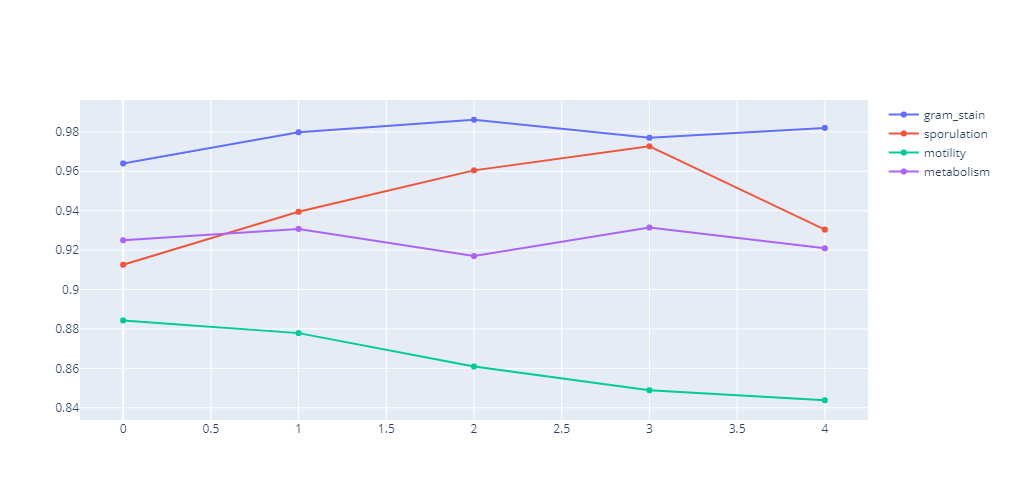

In [99]:
import plotly.graph_objects as go
fig = go.Figure()
for fea,per in fea2performance.items():
    fig.add_scatter(x=list(range(len(per['acc']))),
                   y=per['acc'],name=fea)
fig.layout.width = 500
fig.layout.height= 500
fig.show()